# Laboratorio 9
Oscar Estrada - 20565 <br>
Gabriel Vicente - 20498<br>

### 3.1 Simulación de un sensor

In [6]:
import random
import json

def generar_temperatura():
    temperatura = round(random.uniform(0, 100), 2)
    return temperatura

def generar_humedad():
    humedad = round(random.uniform(0, 100))
    return humedad

def generar_direccion_viento():
    direcciones = ["N", "NW", "W", "SW", "S", "SE", "E", "NE"]
    direccion = random.choice(direcciones)
    return direccion

def generar_datos_sensor():
    temperatura = generar_temperatura()
    humedad = generar_humedad()
    direccion_viento = generar_direccion_viento()

    datos = {
        "temperatura": temperatura,
        "humedad": humedad,
        "direccion_viento": direccion_viento
    }

    return datos

In [7]:
datos_sensor = generar_datos_sensor()
datos_json = json.dumps(datos_sensor, indent=2)

print(datos_json)

{
  "temperatura": 91.13,
  "humedad": 94,
  "direccion_viento": "S"
}


**¿A qué capa pertenece JSON/SOAP según el Modelo OSI y porque?** <br>
Pues ambos JSON y SOAP están relacionados con la capa de aplicación del Modelo OSI, ya que están diseñados para estructurar y facilitar el intercambio de datos entre aplicaciones. 

**¿Qué beneficios tiene utilizar un formato como JSON/SOAP?** <br>
 Tanto la elección entre JSON y SOAP dependerá de los requisitos específicos de tu aplicación y del entorno en el que estás trabajando. JSON es ligero y fácil de usar en situaciones donde la simplicidad y la eficiencia son clave, mientras que SOAP proporciona una serie de características avanzadas, como seguridad y manejo de transacciones, que son esenciales en aplicaciones empresariales complejas.


### 3.2 Envío de Datos al Server Edge

In [8]:
from kafka import KafkaProducer
import time

# Configuración del Servidor
BOOTSTRAP_SERVER = '157.245.244.105:9092'
TOPIC = '20565'

# Configurar el productor de Kafka
producer = KafkaProducer(
    bootstrap_servers=BOOTSTRAP_SERVER,
    value_serializer=lambda v: json.dumps(v).encode('utf-8')
)

def runServer():
    try:
        while True:
            data = generar_datos_sensor()
            key_bytes = 'sensor1'.encode('utf-8')
            producer.send(TOPIC, key=key_bytes, value=data)

            print(f"Mensaje enviado correctamente a {TOPIC} con clave {key_bytes} y datos {data}")

            time.sleep(random.uniform(15, 30))

    except KeyboardInterrupt:
        # Maneja la interrupción de teclado (Ctrl+C)
        pass

    finally:
        producer.close()

In [9]:
runServer()

Mensaje enviado correctamente a 20565 con clave b'sensor1' y datos {'temperatura': 7.24, 'humedad': 64, 'direccion_viento': 'NE'}
Mensaje enviado correctamente a 20565 con clave b'sensor1' y datos {'temperatura': 28.6, 'humedad': 3, 'direccion_viento': 'NE'}


### 3.3 Consumir y Desplegar Datos Meteorológicos

### **En este Jupyter las graficas se muestran en cada actualizacion**
### **Para ver grafica con actualizaciones ejecutar el archivo "ejercicio3.py" junto al archivo "emisor.py"**

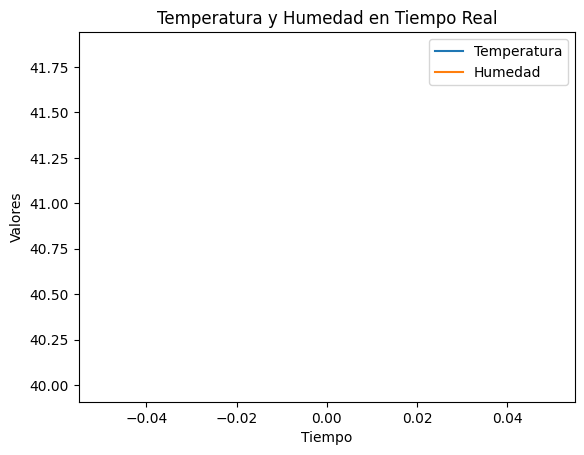

Mensaje recibido: {'temperatura': 41.85, 'humedad': 40, 'direccion_viento': 'NE'}


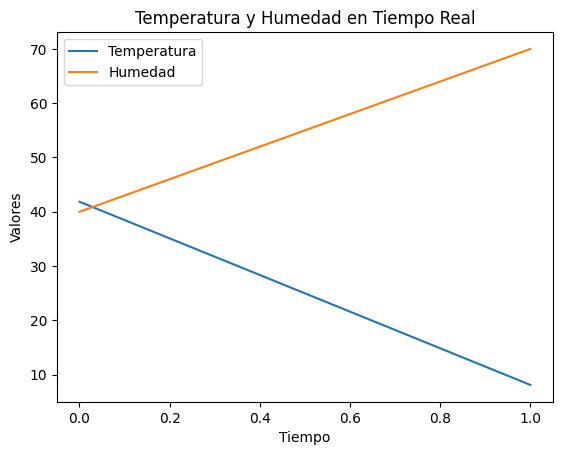

Mensaje recibido: {'temperatura': 8.1, 'humedad': 70, 'direccion_viento': 'W'}


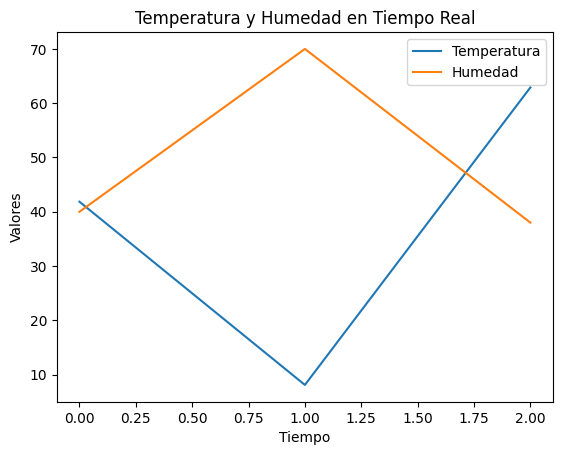

Mensaje recibido: {'temperatura': 62.9, 'humedad': 38, 'direccion_viento': 'N'}


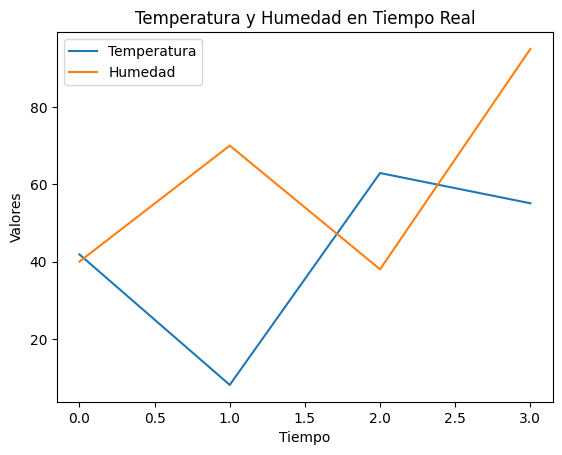

Mensaje recibido: {'temperatura': 55.08, 'humedad': 95, 'direccion_viento': 'SE'}


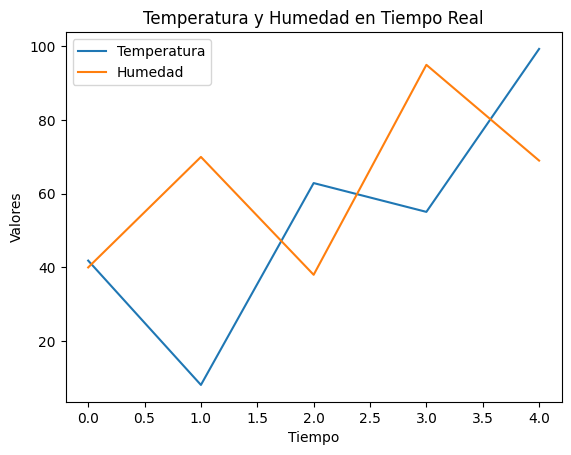

Mensaje recibido: {'temperatura': 99.32, 'humedad': 69, 'direccion_viento': 'SW'}


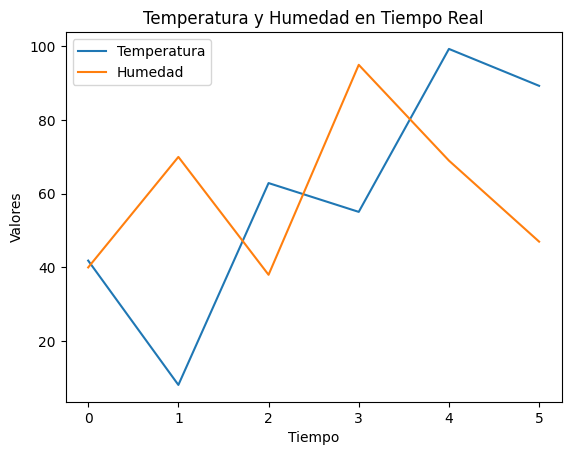

Mensaje recibido: {'temperatura': 89.3, 'humedad': 47, 'direccion_viento': 'SE'}


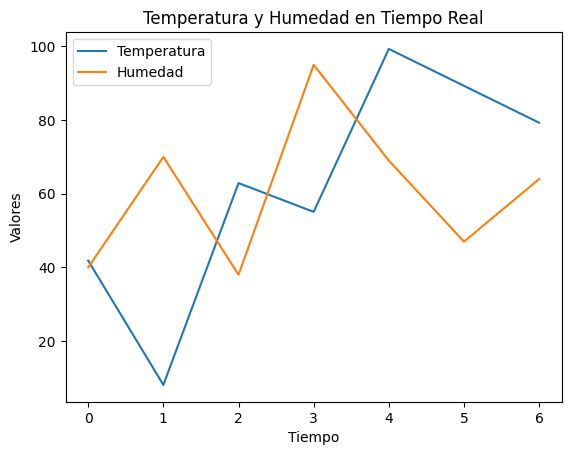

Mensaje recibido: {'temperatura': 79.29, 'humedad': 64, 'direccion_viento': 'SE'}


<Figure size 640x480 with 0 Axes>

In [1]:
from kafka import KafkaConsumer
import json
import matplotlib.pyplot as plt


BOOTSTRAP_SERVER = '157.245.244.105:9092'
TOPIC = '20565'


temperaturas = []
humedades = []

def procesar_mensaje(mensaje):
    payload = mensaje.value
    return payload

def actualizar_grafica(temperatura, humedad):

    temperaturas.append(temperatura)
    humedades.append(humedad)

    plt.plot(temperaturas, label='Temperatura')
    plt.plot(humedades, label='Humedad')

    plt.legend()
    plt.xlabel('Tiempo')
    plt.ylabel('Valores')
    plt.title('Temperatura y Humedad en Tiempo Real')

    plt.pause(0.1)
    plt.clf() 

def main():

    consumer = KafkaConsumer(TOPIC,
                                group_id='foo2',
                                bootstrap_servers=BOOTSTRAP_SERVER,
                                value_deserializer=lambda x: json.loads(x.decode('utf-8')))

    try:
        for mensaje in consumer:
            payload = procesar_mensaje(mensaje)

            temperatura = payload.get('temperatura', 0)
            humedad = payload.get('humedad', 0)

            actualizar_grafica(temperatura, humedad)

            print(f"Mensaje recibido: {payload}")

    except KeyboardInterrupt:

        pass

    finally:
        consumer.close()

if __name__ == "__main__":
    main()


* ¿Qué ventajas y desventajas considera que tiene este acercamiento basado en Pub/Sub de Kafka?

Kafka, con su arquitectura de publicación/suscripción (Pub/Sub), ofrece notables ventajas como escalabilidad, alta disponibilidad y baja latencia, lo que lo convierte en una opción robusta para la transmisión de datos a gran escala. Sin embargo, presenta desafíos, como la complejidad en la configuración, un mayor consumo de recursos y una curva de aprendizaje pronunciada. La idoneidad de Kafka dependerá en última instancia de las necesidades y requisitos específicos de la aplicación, ya que sus beneficios y limitaciones deben evaluarse cuidadosamente para garantizar su óptimo rendimiento.

* Responda: ¿Para qué aplicaciones tiene sentido usar Kafka? ¿Para cuáles no?

Kafka es adecuado para aplicaciones de transmisión de datos en tiempo real, como análisis de registros, monitorización, y mensajería. Sin embargo es menos apropiado para aplicaciones simples o de baja complejidad.

### 3.4 IoT en Entornos con Restricciones

### **Esperando que se cumpla con lo solicitado, en la carpeta de emisores, en su segunda version este codifica los mensajes de tal manera que solo se envian numeros, la solucion propuesta correspondia en lo siguiente:**

#### * Las direcciones serian clasificadas en numeros del 1 al 8, cumpliendo con la regla de los 3 bits
#### * La humedad al ser numero entero entre 0 a 100 ocuparia un maximo siempre de 7 bits, lo cual deja 14 bits libres aun.
#### * para la parte de temperatura se tuvo la idea de enviar 2 sets de numeros enteros, el primero set corresponderia a la parte entera de la temperatura, mientras que el segundo set corresponderia a la parte decimal de la temperatura de tipo flotante, esto implicaria un uso maximo en el peor de los casos de 7 bits por cada set, es decir los 14 bits restantes. Por lo que la parte receptora decodificaria y concatenaira los dos sets de temperatura logrando asi obtener el numero flotante a partir de numeros enteros.


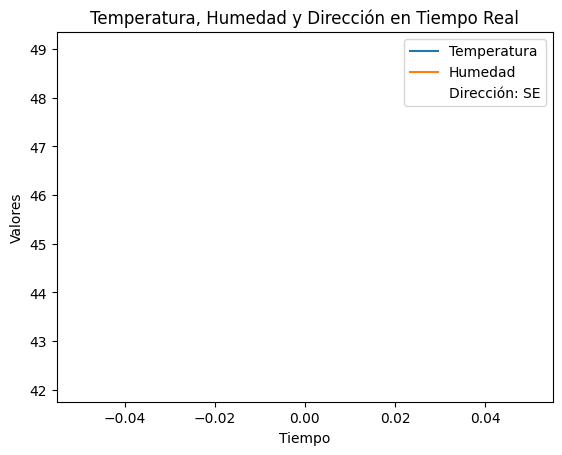

Mensaje recibido: {'t': 42.1, 'h': 49, 'd': 'SE'}


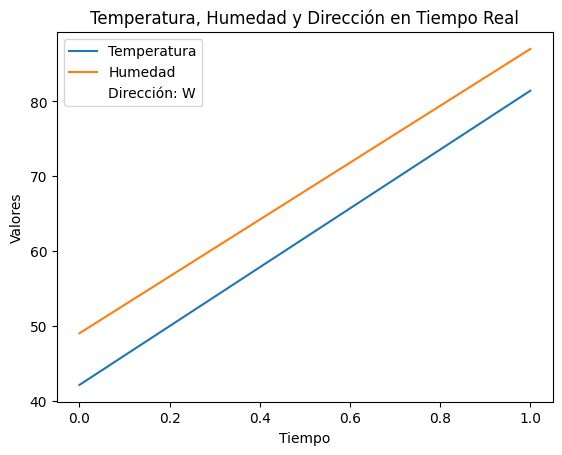

Mensaje recibido: {'t': 81.42, 'h': 87, 'd': 'W'}


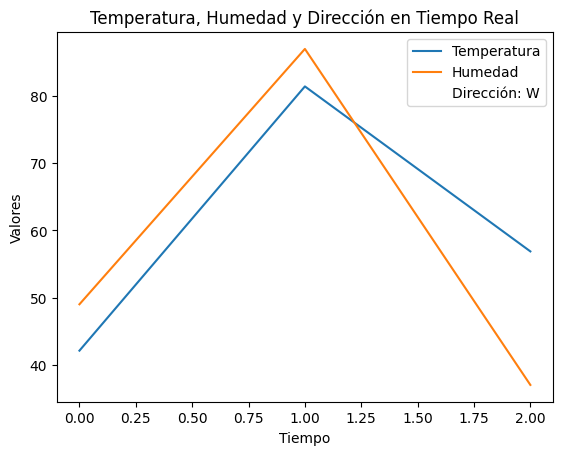

Mensaje recibido: {'t': 56.87, 'h': 37, 'd': 'W'}


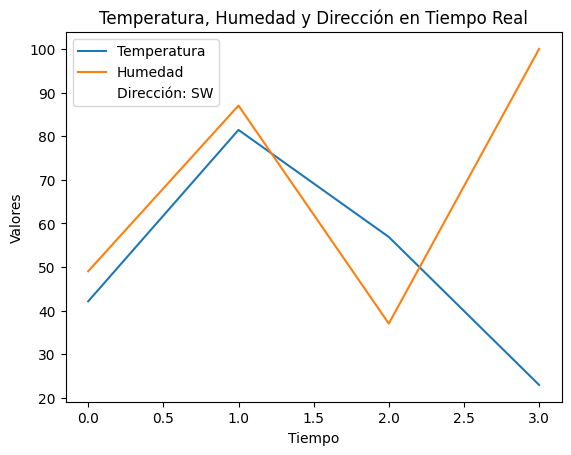

Mensaje recibido: {'t': 22.93, 'h': 100, 'd': 'SW'}


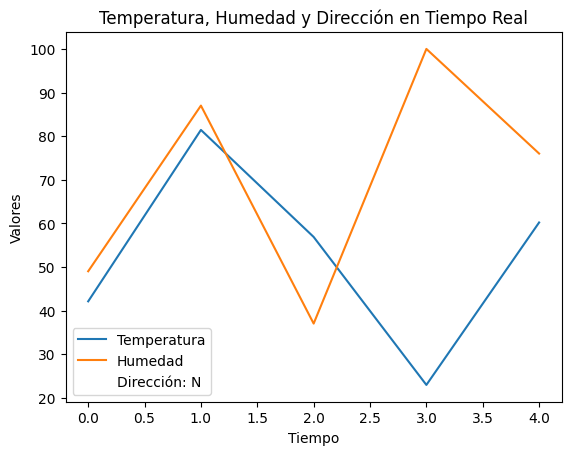

Mensaje recibido: {'t': 60.19, 'h': 76, 'd': 'N'}


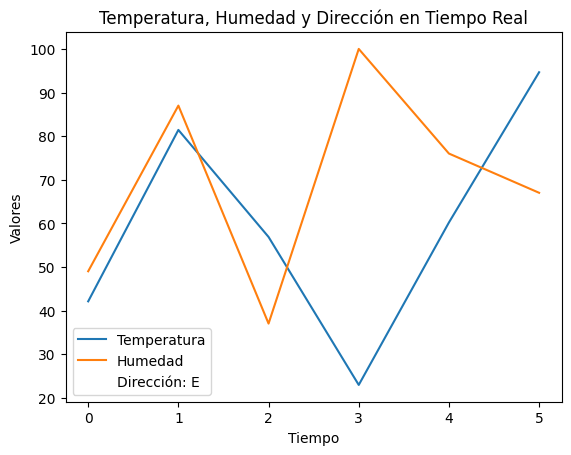

Mensaje recibido: {'t': 94.65, 'h': 67, 'd': 'E'}


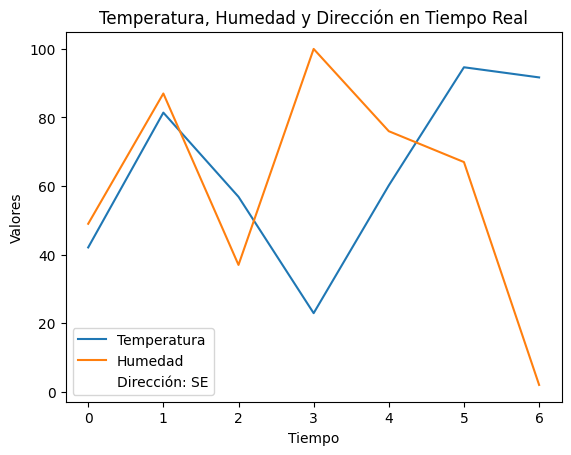

Mensaje recibido: {'t': 91.69, 'h': 2, 'd': 'SE'}


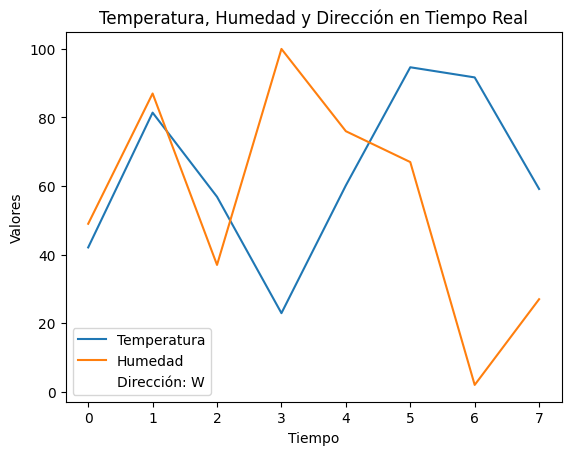

Mensaje recibido: {'t': 59.15, 'h': 27, 'd': 'W'}


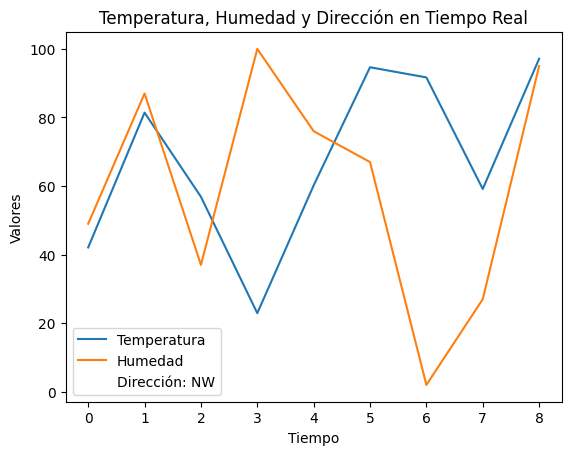

Mensaje recibido: {'t': 97.12, 'h': 95, 'd': 'NW'}


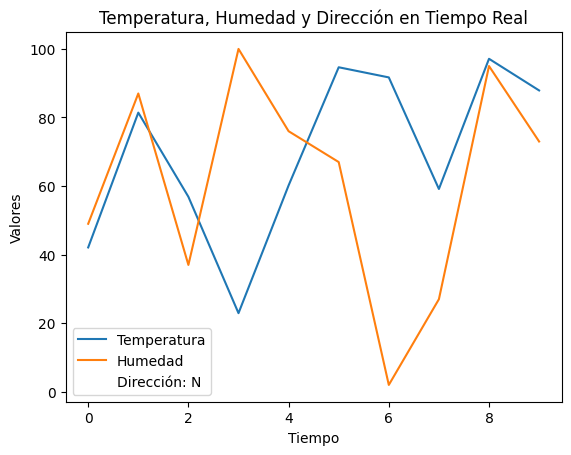

Mensaje recibido: {'t': 87.89, 'h': 73, 'd': 'N'}


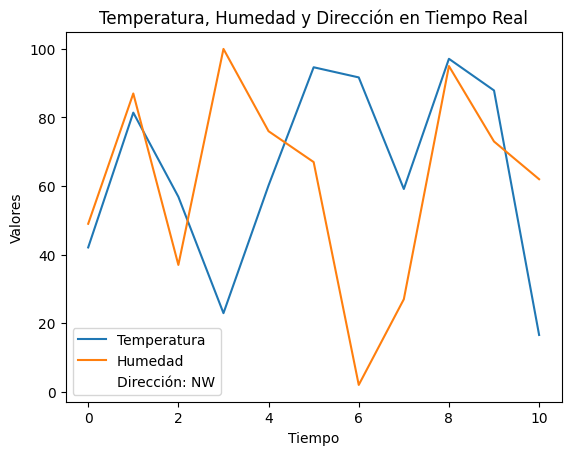

Mensaje recibido: {'t': 16.57, 'h': 62, 'd': 'NW'}


<Figure size 640x480 with 0 Axes>

In [1]:
from kafka import KafkaConsumer
import json
import matplotlib.pyplot as plt

BOOTSTRAP_SERVER = '157.245.244.105:9092'
TOPIC = '20565'

temperaturas = []
humedades = []
direcciones = []

def procesar_mensaje(mensaje):
    payload = mensaje.value
    return payload


def numero_a_direccion(numero):
    direcciones = ["N", "NW", "W", "SW", "S", "SE", "E", "NE"]

    if not 0 <= numero < len(direcciones):
        raise ValueError("Número no válido para dirección del viento")

    direccion = direcciones[numero]
    
    return direccion
def DECODE(payload):
    return {
        "t": float(str(payload.get('t1', 0))+"." + str(payload.get('t2', 0))),
        "h": payload.get('h', 0),
        "d": numero_a_direccion(payload.get('d', 0))
    }

def actualizar_grafica(temperatura, humedad, direccion):
    temperaturas.append(temperatura)
    humedades.append(humedad)
    direcciones.append(direccion)

    plt.plot(temperaturas, label='Temperatura')
    plt.plot(humedades, label='Humedad')

    plt.plot([], [], label='Dirección: ' + direccion, color='white')

    plt.legend()
    plt.xlabel('Tiempo')
    plt.ylabel('Valores')
    plt.title('Temperatura, Humedad y Dirección en Tiempo Real')

    plt.pause(0.1)
    plt.clf()

def main():
    consumer = KafkaConsumer(
        TOPIC,
        group_id='foo2',
        bootstrap_servers=BOOTSTRAP_SERVER,
        value_deserializer=lambda x: json.loads(x.decode('utf-8'))
    )

    try:
        for mensaje in consumer:
            payload = procesar_mensaje(mensaje)
            payload = DECODE(payload)

            actualizar_grafica(payload["t"], payload["h"], payload["d"])

            print(f"Mensaje recibido: {payload}")

    except KeyboardInterrupt:
        pass
    finally:
        consumer.close()

if __name__ == "__main__":
    main()


* ¿Qué complejidades introduce el tener un payload restringido (pequeño)?

Que no se puede enviar indiscriminadamente la información, se debe de enviar de tal manera que siempre se respete el tamaño máximo de 24 bits lo cual implica nomenclaturas, codificaciones y representaciones variadas de los valores.

* ¿Cómo podemos hacer que el valor de temperatura quepa en 14 bits?

Lo que se realizo es que se separó en dos sets de valores enteros (cómo los de humedad) por lo que al redondearlo a un valor máximo de 100 tanto en enteros como decimales siempre respetaría que para cada set se tendría un máximo de 7 bits, que corresponden a las 14 bits restantes

* ¿Qué sucedería si ahora la humedad también es tipo float con un decimal? ¿Qué decisiones tendríamos que tomar en ese caso?

Probablemente se tendrían que cambiar las notaciones o restringir para ciertos rangos de temperatura y humedad, de tal manera que se utilicen siempre menos de 4 números para cada set de tal modo que aún se pueda realizar el envío

* ¿Qué parámetros o herramientas de Kafka podrían ayudarnos si las restricciones fueran aún más fuertes?

Para delimitarlas podríamos utilizar max_request_size o replica.fetch.max.bytes que pueden ser de utilidad en dado caso se necesiten mas restricciones.